In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
CSV_PATH = "data/enhanced_anxiety_dataset.csv"   
TARGET_COL = "Anxiety Level (1-10)"         

df = pd.read_csv(CSV_PATH)

# Convert categorical to numeric if needed (optional)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Convert target to two classes using median
median_value = df[TARGET_COL].median()
df["BinaryTarget"] = (df[TARGET_COL] > median_value).astype(int)

print(df[[TARGET_COL, "BinaryTarget"]].head())


   Anxiety Level (1-10)  BinaryTarget
0                   5.0             1
1                   3.0             0
2                   1.0             0
3                   2.0             0
4                   1.0             0


In [ ]:
FEATURE_COLS = ["Sleep Hours", "Physical Activity (hrs/week)"]  

X = df[FEATURE_COLS].values
y = df["BinaryTarget"].values


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


In [5]:
lr = LogisticRegression()
nb = GaussianNB()

lr.fit(X_train_s, y_train)
nb.fit(X_train_s, y_train)


,priors,None
,var_smoothing,1e-09


In [6]:
y_pred_lr = lr.predict(X_test_s)
y_pred_nb = nb.predict(X_test_s)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nNaive Bayes:\n",      classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.7418181818181818
Naive Bayes Accuracy: 0.7407272727272727

Logistic Regression:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      1905
           1       0.68      0.31      0.42       845

    accuracy                           0.74      2750
   macro avg       0.71      0.62      0.63      2750
weighted avg       0.73      0.74      0.71      2750


Naive Bayes:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83      1905
           1       0.66      0.33      0.44       845

    accuracy                           0.74      2750
   macro avg       0.71      0.63      0.63      2750
weighted avg       0.73      0.74      0.71      2750



In [7]:
def plot_decision_boundary(clf, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = clf.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.xlabel(FEATURE_COLS[0])
    plt.ylabel(FEATURE_COLS[1])
    plt.title(title)
    plt.show()


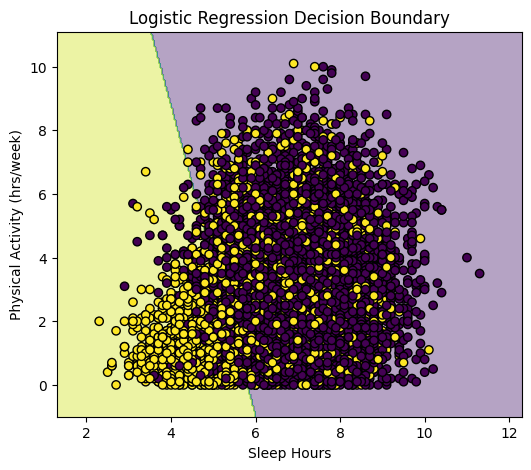

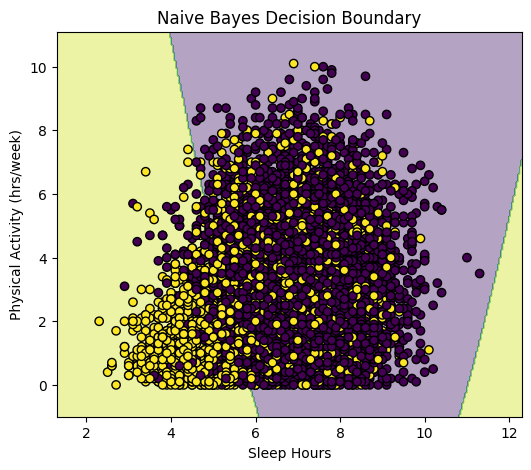

In [8]:
plot_decision_boundary(lr, "Logistic Regression Decision Boundary")
plot_decision_boundary(nb, "Naive Bayes Decision Boundary")
